<a href="https://colab.research.google.com/github/Krishnan9074/Krishnan9074/blob/main/heatwavepred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
hw=pd.read_csv("heatwavedata1.csv")
hw.head()

,row_id,district,mandal,location,odate,cumm_rainfall,temp_min,temp_max,humidity_min,humidity_max,wind_speed_min,wind_speed_max,heatwave,
0,12650,Warangal (U),Dharmasagar,Dharmasagar,01-01-2018,0.0,16.2,32.5,28.9,89.4,0.0,6.5,NO,NaN
1,12651,Warangal (U),Dharmasagar,Dharmasagar,02-01-2018,0.0,18.2,32.1,42.1,88.2,0.0,6.3,NO,NaN
2,12652,Warangal (U),Dharmasagar,Dharmasagar,03-01-2018,0.0,16.5,32.1,40.9,96.5,0.0,6.8,NO,NaN
3,12653,Warangal (U),Dharmasagar,Dharmasagar,04-01-2018,0.0,17.0,32.1,34.4,95.8,0.0,10.9,NO,NaN
4,12654,Warangal (U),Dharmasagar,Dharmasagar,05-01-2018,0.0,17.0,30.3,38.8,74.9,0.0,9.4,NO,NaN


In [3]:
hw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25409 entries, 0 to 25408
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   row_id          25409 non-null  int64  
 1   district        25409 non-null  object 
 2   mandal          25409 non-null  object 
 3   location        25409 non-null  object 
 4   odate           25409 non-null  object 
 5   cumm_rainfall   25409 non-null  float64
 6   temp_min        25409 non-null  float64
 7   temp_max        25409 non-null  float64
 8   humidity_min    25409 non-null  float64
 9   humidity_max    25409 non-null  float64
 10  wind_speed_min  25385 non-null  float64
 11  wind_speed_max  25385 non-null  float64
 12  heatwave        25409 non-null  object 
 13                  0 non-null      float64
dtypes: float64(8), int64(1), object(5)
memory usage: 2.7+ MB


In [4]:
hw1=hw[['district','temp_min','temp_max','humidity_min','humidity_max','wind_speed_min','wind_speed_max','heatwave']]
hw1.head()

,district,temp_min,temp_max,humidity_min,humidity_max,wind_speed_min,wind_speed_max,heatwave
0,Warangal (U),16.2,32.5,28.9,89.4,0.0,6.5,NO
1,Warangal (U),18.2,32.1,42.1,88.2,0.0,6.3,NO
2,Warangal (U),16.5,32.1,40.9,96.5,0.0,6.8,NO
3,Warangal (U),17.0,32.1,34.4,95.8,0.0,10.9,NO
4,Warangal (U),17.0,30.3,38.8,74.9,0.0,9.4,NO


In [5]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder

# Converting type of columns to category
hw1['district']=hw1['district'].astype('category')
hw1['heatwave']=hw1['heatwave'].astype('category')


#Assigning numerical values and storing it in another columns
hw1['new_district']=hw1['district'].cat.codes
hw1['new_heatwave']=hw1['heatwave'].cat.codes
enc=OneHotEncoder()
hw2=pd.DataFrame(enc.fit_transform(hw1[['new_district','new_heatwave']]).toarray())

#Merge with main
hw3=hw1.join(hw2)
hw3.dropna()
hw3


<ipython-input-5-00ed18e433e2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hw1['district']=hw1['district'].astype('category')
<ipython-input-5-00ed18e433e2>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hw1['heatwave']=hw1['heatwave'].astype('category')
<ipython-input-5-00ed18e433e2>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

,district,temp_min,temp_max,humidity_min,humidity_max,wind_speed_min,wind_speed_max,heatwave,new_district,new_heatwave,0,1,2,3,4,5,6,7
0,Warangal (U),16.2,32.5,28.9,89.4,0.0,6.5,NO,5,0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,Warangal (U),18.2,32.1,42.1,88.2,0.0,6.3,NO,5,0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,Warangal (U),16.5,32.1,40.9,96.5,0.0,6.8,NO,5,0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,Warangal (U),17.0,32.1,34.4,95.8,0.0,10.9,NO,5,0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,Warangal (U),17.0,30.3,38.8,74.9,0.0,9.4,NO,5,0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25404,Nizamabad,26.6,37.8,37.3,77.8,0.0,18.9,NO,3,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
25405,Nizamabad,25.0,37.2,36.1,84.3,0.0,15.7,NO,3,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
25406,Nizamabad,27.4,36.6,24.9,71.0,0.0,8.0,NO,3,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
25407,Nizamabad,29.5,40.5,25.6,69.9,0.0,13.0,NO,3,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [6]:
hw4=hw3[['new_district','temp_min','temp_max','humidity_min','humidity_max','wind_speed_min','wind_speed_max','new_heatwave']]
mean_value1=hw4['wind_speed_min'].mean()
mean_value2=hw4['wind_speed_max'].mean()  
hw4['wind_speed_min'].fillna(value=mean_value1, inplace=True)
hw4['wind_speed_max'].fillna(value=mean_value2, inplace=True)
hw4 = hw4.reset_index()
hw4


/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


,index,new_district,temp_min,temp_max,humidity_min,humidity_max,wind_speed_min,wind_speed_max,new_heatwave
0,0,5,16.2,32.5,28.9,89.4,0.0,6.5,0
1,1,5,18.2,32.1,42.1,88.2,0.0,6.3,0
2,2,5,16.5,32.1,40.9,96.5,0.0,6.8,0
3,3,5,17.0,32.1,34.4,95.8,0.0,10.9,0
4,4,5,17.0,30.3,38.8,74.9,0.0,9.4,0
...,...,...,...,...,...,...,...,...,...
25404,25404,3,26.6,37.8,37.3,77.8,0.0,18.9,0
25405,25405,3,25.0,37.2,36.1,84.3,0.0,15.7,0
25406,25406,3,27.4,36.6,24.9,71.0,0.0,8.0,0
25407,25407,3,29.5,40.5,25.6,69.9,0.0,13.0,0


In [7]:
hw4.describe()

,index,new_district,temp_min,temp_max,humidity_min,humidity_max,wind_speed_min,wind_speed_max,new_heatwave
count,25409.000000,25409.000000,25409.000000,25409.000000,25409.000000,25409.000000,25409.000000,25409.000000,25409.000000
mean,12704.000000,2.393916,22.846676,34.974711,42.966933,82.420225,0.233733,10.692905,0.007871
std,7335.090831,1.493404,4.469172,4.210490,20.697688,14.921942,0.988444,6.896360,0.088372
min,0.000000,0.000000,7.200000,22.600000,4.400000,16.300000,0.000000,0.000000,0.000000
25%,6352.000000,1.000000,20.400000,32.100000,26.300000,73.700000,0.000000,6.300000,0.000000
50%,12704.000000,2.000000,24.000000,34.800000,39.000000,84.700000,0.000000,9.600000,0.000000
75%,19056.000000,3.000000,25.900000,37.800000,57.500000,95.900000,0.000000,14.000000,0.000000
max,25408.000000,5.000000,33.800000,45.000000,99.900000,100.000000,23.200000,68.800000,1.000000


In [8]:
from sklearn.model_selection import train_test_split
features=['new_district','temp_min','temp_max','humidity_min','humidity_max','wind_speed_min','wind_speed_max']
X = hw4.loc[:, features]
y = hw4.loc[:, ['new_heatwave']]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .75)
print(X_train, X_test, y_train, y_test)

       new_district  temp_min  temp_max  humidity_min  humidity_max  \
25112             3      20.2      37.6          22.7          56.1   
15371             2      24.5      33.0          55.6          84.6   
495               5      24.0      32.8          70.3         100.0   
11153             4      23.3      28.4          60.7          80.7   
6283              0      22.7      28.3          84.7          96.8   
...             ...       ...       ...           ...           ...   
13123             4      25.8      32.6          65.1          89.0   
19648             1      20.7      35.5          52.6          87.2   
9845              0      24.8      29.7          82.3          98.4   
10799             4      24.6      36.3          29.9          78.7   
2732              3      22.2      35.8          42.7          81.1   

       wind_speed_min  wind_speed_max  
25112             0.0            11.9  
15371             0.0             6.5  
495               0.0      

In [9]:
N,D=X_train.shape
N,D

(19056, 7)

In [10]:
from sklearn.preprocessing import StandardScaler
scalar= StandardScaler()
X_train= scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)


In [11]:
import tensorflow as tf


In [12]:
model=tf.keras.models.Sequential([
    
    tf.keras.layers.Input(shape=(D,)),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [13]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [14]:
print(model.evaluate(X_train,y_train))

596/596 [==============================] - 2s 2ms/step - loss: 0.8602 - accuracy: 0.4966
[0.8601988554000854, 0.49664148688316345]


In [16]:
r=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10)
#idk i aint getting why loss is nan

Epoch 1/10
596/596 [==============================] - 2s 3ms/step - loss: 0.0120 - accuracy: 0.9960 - val_loss: 0.0125 - val_accuracy: 0.9959
Epoch 2/10
596/596 [==============================] - 2s 4ms/step - loss: 0.0119 - accuracy: 0.9960 - val_loss: 0.0124 - val_accuracy: 0.9959
Epoch 3/10
596/596 [==============================] - 2s 3ms/step - loss: 0.0118 - accuracy: 0.9961 - val_loss: 0.0123 - val_accuracy: 0.9959
Epoch 4/10
596/596 [==============================] - 2s 3ms/step - loss: 0.0117 - accuracy: 0.9961 - val_loss: 0.0122 - val_accuracy: 0.9961
Epoch 5/10
596/596 [==============================] - 1s 2ms/step - loss: 0.0116 - accuracy: 0.9962 - val_loss: 0.0122 - val_accuracy: 0.9961
Epoch 6/10
596/596 [==============================] - 1s 2ms/step - loss: 0.0115 - accuracy: 0.9961 - val_loss: 0.0121 - val_accuracy: 0.9967
Epoch 7/10
596/596 [==============================] - 1s 2ms/step - loss: 0.0114 - accuracy: 0.9964 - val_loss: 0.0120 - val_accuracy: 0.9965
Epoch 

In [26]:
import pickle
pickle.dump(r,open("model_gb.pkl","wb"))

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......dense
.........vars
............0
............1
...metrics
......mean
.........vars
............0
............1
......mean_metric_wrapper
.........vars
............0
............1
...optimizer
......vars
.........0
.........1
.........2
.........3
.........4
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2023-03-04 17:26:20         1570
metadata.json                                  2023-03-04 17:26:20           64
variables.h5                                   2023-03-04 17:26:20        17192


In [27]:
!pip install fastapi
!pip install uvicorn
!pip install pickle5
!pip install pydantic
!pip install scikit-learn
!pip install requests
!pip install pypi-json
!pip install pyngrok
!pip install nest-asyncio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.2/56.2 KB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 KB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.6/80.6 KB 8.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 KB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 KB 8.1 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.1/132.1 KB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pickle5: filename=pickle5-0.0.11-cp38-cp38-linux_x86_64.whl size=262128 sha256=6b7d7781f33e13f702e7af111b95bb5c87e68cf101ec4df8a858ff0cc22dd49f
  Stored in direc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 761.3/761.3 KB 11.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyngrok: filename=pyngrok-5.2.1-py3-none-any.whl size=19792 sha256=1ff5995c91b8ee9ee0e0a4757ea08a9f22c1234415c6d1b9b5efbdea5aa87d8f
  Stored in directory: /root/.cache/pip/wheels/5d/f2/70/526da675d32f17577ec47ac4c663084efe39d47c826b6c3bb1
Successfully built pyngrok
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [28]:
from fastapi import FastAPI
from pydantic import BaseModel
import pickle
import json
import uvicorn
from pyngrok import ngrok
from fastapi.middleware.cors import CORSMiddleware
import nest_asyncio

In [29]:
ngrok.set_auth_token("2MYlb6n6KGlYnEXVMpY3hW4MQqr_2Qin7wfQ7VEYHhjds3Q4d")
public_url=ngrok.connect(8000).public_url

In [30]:
print(public_url)

http://c51f-35-237-200-195.ngrok.io


In [33]:
port_no=8000

In [34]:
from flask import Flask
app = Flask(__name__)
ngrok.set_auth_token("2MYlb6n6KGlYnEXVMpY3hW4MQqr_2Qin7wfQ7VEYHhjds3Q4d")
public_url =  ngrok.connect(port_no).public_url

@app.route("/")
def home():
    return f"Running Flask on Google Colab!"

print(f"To acces the Gloable link please click {public_url}")

app.run(port=port_no)

PyngrokNgrokHTTPError: ignored

In [ ]:
app = FastAPI()

In [ ]:
origins = ["*"]

app.add_middleware(
    CORSMiddleware,
    allow_origins=origins,
    allow_credentials=True,
    allow_methods=["*"],
    allow_headers=["*"],
)

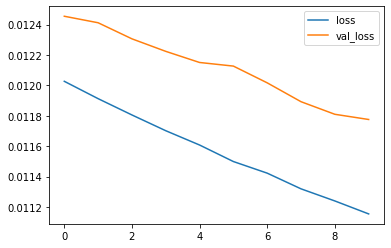

In [17]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

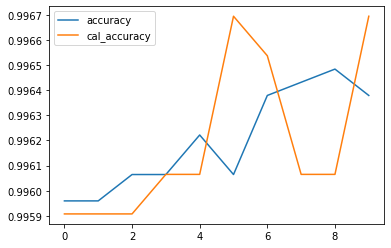

In [18]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='cal_accuracy')
plt.legend()

In [19]:
print(model.evaluate(X_test,y_test))

199/199 [==============================] - 0s 2ms/step - loss: 0.0118 - accuracy: 0.9967
[0.011775695718824863, 0.9966944456100464]


In [20]:
hw5=hw4[hw4['new_heatwave']==1]
hw5

,index,new_district,temp_min,temp_max,humidity_min,humidity_max,wind_speed_min,wind_speed_max,new_heatwave
88,88,5,24.3,40.3,23.3,97.2,0.0,9.5,1
89,89,5,24.6,40.3,40.0,98.2,0.1,11.6,1
110,110,5,25.4,42.3,14.3,90.8,0.0,14.7,1
132,132,5,24.4,42.3,23.0,96.6,0.3,14.5,1
134,134,5,22.8,40.2,28.9,96.2,0.0,29.1,1
...,...,...,...,...,...,...,...,...,...
23520,23520,4,27.2,41.3,40.1,99.6,0.0,9.4,1
23527,23527,4,24.9,42.3,41.4,97.8,0.0,5.0,1
24082,24082,3,24.4,41.3,33.5,96.9,5.5,26.7,1
24621,24621,3,24.4,42.3,26.0,96.2,4.0,50.8,1


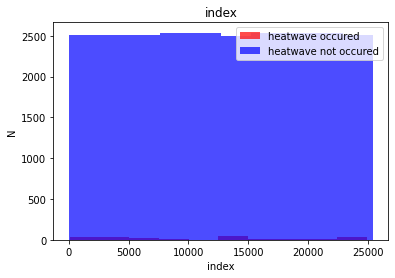

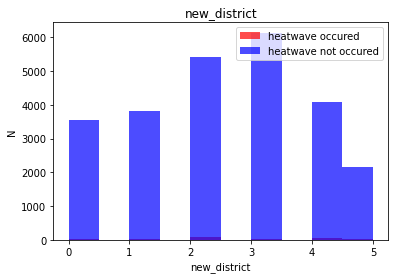

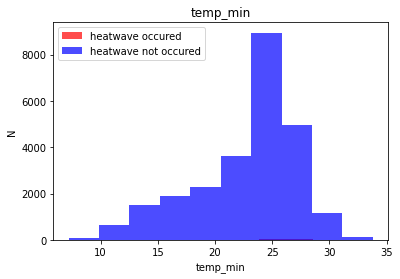

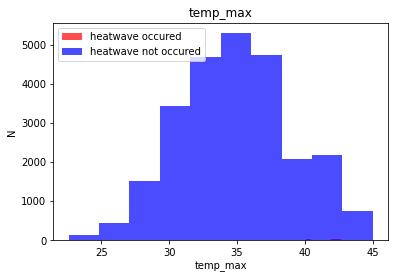

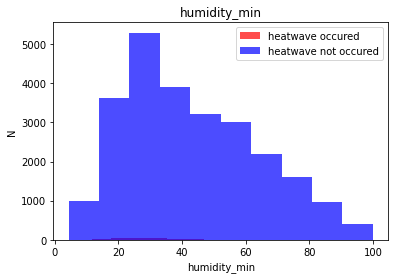

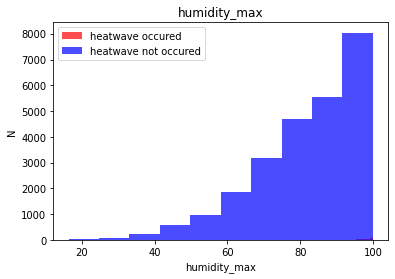

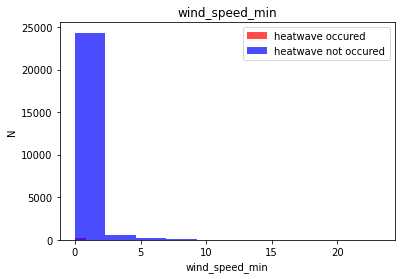

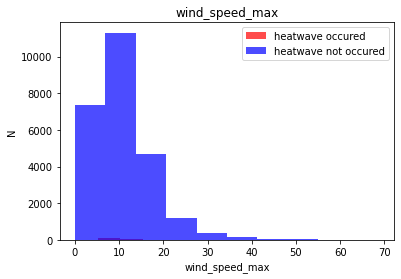

In [21]:
import matplotlib.pyplot as plt
for i in range(len(hw4.columns[:-1])):
  label=hw4.columns[i]
  plt.hist(hw4[hw4['new_heatwave']==1][label],color='red',label="heatwave occured",alpha=0.7)
  plt.hist(hw4[hw4['new_heatwave']==0][label],color='blue',label="heatwave not occured",alpha=0.7)
  plt.title(label)
  plt.ylabel("N")
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [22]:
#thought of tryin knn and chekin accuracy as the nn is clearly overfitting
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)


In [23]:
knn.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=10)

In [24]:
knn.score(X_test, y_test)

0.994963009601763